# Linear Regression

In [1]:
# Y = mX + c
# Multiple Linear Regression
# Y = m1X1 + m2X2 + m3X3 + ... + c

# Advantages:
# 1. More accurate
# 2. Captures more information
# 3. Relationship between dependent and independent variables

# Disadvantages:
# 1. Overfitting
# 2. More complex
# 3. More time consuming
# 4. More data required
# 5. More assumptions


In [2]:
# Loss Function
# Measure how far the predicted value is from the actual value
# Mean Squared Error (MSE) = 1/n * Σ(yi - ŷi)^2
# yi = actual value
# ŷi = predicted value
# n = number of observations

# Lower the value of Loss Function, Higher the accuracy of the model

In [3]:
# Gradient Descent
# Optimization algorithm to minimize the loss function
# Find the optimal values of the coefficients (m1, m2, m3, ..., c)
# Start with random values of the coefficients
# Update the values of the coefficients to minimize the loss function
# Repeat until the optimal values of the coefficients are
# found which minimize the loss function

In [1]:
# Y = wX + b
# Y --> Dependent Variable
# X --> Independent Variable
# w --> Weight
# b --> Bias

In [2]:
# Importing numpy library
import numpy as np


In [21]:
# importing numpy library
import numpy as np

class Linear_Regression():

    # initiating the parameters (learning rate & no. of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        # number of training examples & number of features
        self.m, self.n = X.shape  # number of rows & columns

        # initiating the weight and bias 
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent
        for _ in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # calculate gradients
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
# Datapreprocessing
# Importing the dataset
salary_data = pd.read_csv('salary_data.csv')

In [12]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [13]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [14]:
# Number of Rows and Colums
salary_data.shape

(30, 2)

In [15]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
# Splitting the Feature and Target
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

In [18]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [19]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [20]:
# Sploitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

In [22]:
# Training the Linear Regression model
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [23]:
model.fit(X_train, Y_train)

In [24]:
# Printing the parameters values
print("Weight : ", model.w[0])
print("Bias : ", model.b)

Weight :  9580.301196603597
Bias :  23226.38946603212


In [25]:
# Predict the salary value for the test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]


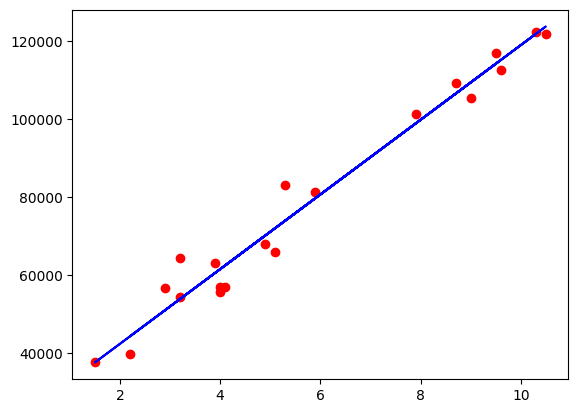

In [29]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')

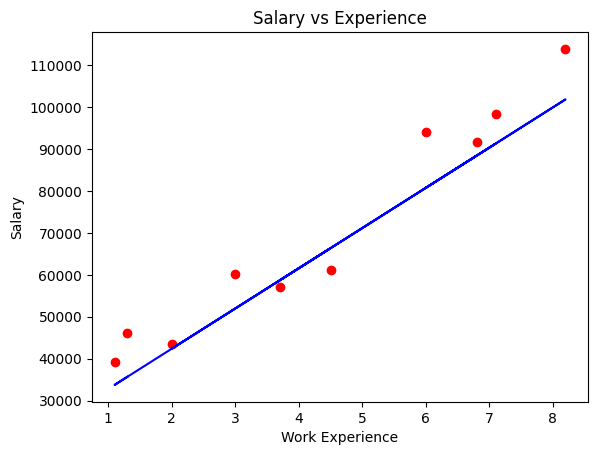

In [32]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.show()